In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

In [2]:
drawing = False # true if mouse is pressed
mode = True 
ix,iy = -1,-1
rx,ry = -1,-1
font = cv2.FONT_HERSHEY_SIMPLEX
value=0
img = cv2.imread('t0.png')
img1=img.copy()
img2=img.copy()
mouse = "Mouse position ("+str(ix)+","+str(iy)+") - ("+str(rx)+","+str(ry)+") - " +str(value) +" -"+str(mode)


In [3]:

def draw_rectangle(event,x,y,flags,param):
    global ix,iy,rx,ry,drawing,mode,img,img1,mouse,img2
    rx,ry = x,y
    if event == cv2.EVENT_LBUTTONDOWN:
        img1 = img.copy()
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                start_x, end_x = (ix, x) if ix < x else (x, ix)
                start_y, end_y = (iy, y) if iy < y else (y, iy)
                img1[start_y:end_y, start_x:end_x,value] = np.ones((end_y-start_y, end_x-start_x))
                cv2.rectangle(img1,(ix,iy),(x,y),(0,255,0),3)
            else:
                cv2.circle(img1,(x,y),5,(0,0,255),-1)
                img2=img1.copy()
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            img1=img.copy()
            cv2.rectangle(img1,(ix,iy),(x,y),(255,255,255),3)
            start_x, end_x = (ix, x) if ix < x else (x, ix)
            start_y, end_y = (iy, y) if iy < y else (y, iy)
            img1[start_y:end_y, start_x:end_x,value] = np.ones((end_y-start_y, end_x-start_x))
            img2=img1.copy()
        else:
            cv2.circle(img1,(x,y),5,(0,0,255),-1)
            img2=img1.copy()

In [4]:
def nothing(x):
    pass

In [5]:
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_rectangle)
cv2.createTrackbar('value','image',0,2,nothing)

In [6]:
while(1):
    img1=img2.copy()
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
    value = cv2.getTrackbarPos('value','image')
    mouse = "Mouse position ("+str(ix)+","+str(iy)+") - ("+str(rx)+","+str(ry)+") - " +str(value) +" -"+str(mode)
    cv2.putText(img1,mouse,(10,30),font,.6,(0,0,0),2,cv2.LINE_AA)
    cv2.imshow('image',img1)
cv2.destroyAllWindows()

In [28]:
def pltImage(img):
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()

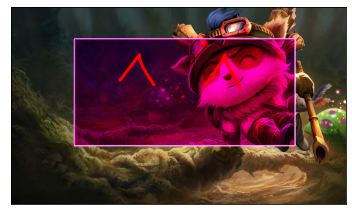

In [29]:
b, g, r = cv2.split(img1)
img3 = cv2.merge((r,g,b))
pltImage(img3)